In [1]:
#stage1:scrape some data files and answer some geography questions
#In this stage, you will write code to download the data files, 
#load the data to Pandas DataFrames, and answer various questions about the data.

In [2]:
import requests, json, os, math, sqlite3
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [3]:
#download data from website
url_q1 = "https://tyler.caraza-harter.com/cs301/spring19/data/countries.json"
countries = pd.read_json(url_q1)
type(countries)

pandas.core.frame.DataFrame

In [4]:
#Question 1: what is the total area across all the countries in the dataset?
countries.sum()[0]

127493303

In [13]:
#Question 2: what is the first URL in the manifest.txt page?
url_q2 = "https://tyler.caraza-harter.com/cs301/spring19/data/capitals/manifest.txt"
mannifest = requests.get(url_q2)

In [14]:
mannifest = mannifest.text.split("\n")[:-1]
mannifest[0]

'Brazil_Peru.json'

In [15]:
def get_json(url):
    filename = url.split("/")[-1]
    if not os.path.exists(filename):
        file = requests.get(url).json()
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(file, f)
        return file
    else:
        with open(filename, 'r', encoding='utf-8') as f:
            file = json.load(f)
        return file

In [22]:
capital_rows = []
for i in mannifest:
    path = "https://tyler.caraza-harter.com/cs301/spring19/data/capitals/" + i
    capital_rows = capital_rows + get_json(path)
#Question 3: what is capital_rows?
capital_rows


[{'capital': 'Brasilia',
  'country': 'Brazil',
  'latitude': -15.783333333333333,
  'longitude': -47.916667},
 {'capital': 'Nouakchott',
  'country': 'Mauritania',
  'latitude': 18.066666666666666,
  'longitude': -15.966667000000001},
 {'capital': 'Bern',
  'country': 'Switzerland',
  'latitude': 46.91666666666666,
  'longitude': 7.466667},
 {'capital': 'Zagreb',
  'country': 'Croatia',
  'latitude': 45.8,
  'longitude': 16.0},
 {'capital': 'Cairo',
  'country': 'Egypt',
  'latitude': 30.05,
  'longitude': 31.25},
 {'capital': 'Sanaa',
  'country': 'Yemen',
  'latitude': 15.35,
  'longitude': 44.2},
 {'capital': 'Helsinki',
  'country': 'Finland',
  'latitude': 60.16666666666666,
  'longitude': 24.933332999999998},
 {'capital': 'Addis Ababa',
  'country': 'Ethiopia',
  'latitude': 9.033333333333333,
  'longitude': 38.7},
 {'capital': 'Prague',
  'country': 'Czech Republic',
  'latitude': 50.08333333333334,
  'longitude': 14.466667000000001},
 {'capital': 'Maseru',
  'country': 'Lesoth

In [23]:
from pandas import DataFrame
capitals = DataFrame(capital_rows)
capitals

,capital,country,latitude,longitude
0,Brasilia,Brazil,-15.783333,-47.916667
1,Nouakchott,Mauritania,18.066667,-15.966667
2,Bern,Switzerland,46.916667,7.466667
3,Zagreb,Croatia,45.800000,16.000000
4,Cairo,Egypt,30.050000,31.250000
5,Sanaa,Yemen,15.350000,44.200000
6,Helsinki,Finland,60.166667,24.933333
7,Addis Ababa,Ethiopia,9.033333,38.700000
8,Prague,Czech Republic,50.083333,14.466667
9,Maseru,Lesotho,-29.316667,27.483333


In [31]:
#Question 4: what is the capital of Bermuda?

capitals[capitals["country"] == "Bermuda"].loc[108,'capital']

'Hamilton'

In [35]:
series=capitals[capitals["country"] == "Bermuda"]['capital']
pd.Series.item(series)

'Hamilton'

In [37]:
#Question 5: Which country's capital is Maputo?
capitals[capitals["capital"] == "Maputo"].iat[0,1]

'Mozambique'

In [65]:
#Question 6: which 5 countries have the southern-most capitals?
capital_q6 = capitals.sort_values(by = ["latitude"])
capital_q6

,capital,country,latitude,longitude
26,Wellington,New Zealand,-41.300000,174.783333
152,Canberra,Australia,-35.266667,149.133333
79,Montevideo,Uruguay,-34.850000,-56.166667
150,Buenos Aires,Argentina,-34.583333,-58.666667
120,Santiago,Chile,-33.450000,-70.666667
9,Maseru,Lesotho,-29.316667,27.483333
154,Mbabane,Swaziland,-26.316667,31.133333
98,Maputo,Mozambique,-25.950000,32.583333
165,Pretoria,South Africa,-25.700000,28.216667
172,Asuncion,Paraguay,-25.266667,-57.666667


In [39]:
capital_q6 = capital_q6.head()
list(capital_q6['country'])

['New Zealand', 'Australia', 'Uruguay', 'Argentina', 'Chile']

In [40]:
#Question 7: which 3 countries have the northern-most capitals?
capital_q7 = capitals.sort_values(by = ["latitude"], ascending = False)
capital_q7 = capital_q7.head(3)
list(capital_q7['country'])

['Iceland', 'Finland', 'Norway']

In [42]:
#Question 8: for "birth-rate" and "death-rate", 
#what are various summary statistics (e.g., mean, max, standard deviation, etc)?
countries.describe()[["birth-rate", "death-rate"]]

,birth-rate,death-rate
count,175.000000,175.000000
mean,22.536114,9.654971
std,11.287090,5.187216
min,8.250000,2.410000
25%,12.635000,6.075000
50%,20.340000,8.230000
75%,30.200000,11.965000
max,50.730000,29.740000


In [49]:
#Question 9: for columns literacy and phones, what are various summary statistics?
countries[["literacy", "phones"]]

,literacy,phones
0,"96,2","213,0"
1,"89,1","281,3"
2,"94,1","115,7"
3,"85,1","8,1"
4,"93,7","91,2"
5,"57,5","2,3"
6,"97,9","453,5"
7,"92,3","61,5"
8,"75,8","85,5"
9,"92,8","505,0"


In [50]:
countries[["literacy", "phones"]].replace(regex = ",", value= ".").astype('float')

,literacy,phones
0,96.2,213.0
1,89.1,281.3
2,94.1,115.7
3,85.1,8.1
4,93.7,91.2
5,57.5,2.3
6,97.9,453.5
7,92.3,61.5
8,75.8,85.5
9,92.8,505.0


In [55]:
#Question 10: what is the largest land-locked country in Europe?
zeroCL = countries[countries['coastline'] == 0]
zeroCL_EU = zeroCL[zeroCL['continent'] == 'Europe']
zeroCL_EU.sort_values(by = ['area'], ascending = False)[['country']].iloc[0,0]

'Belarus'

In [58]:
#Question 11: what is the largest land-locked country in Africa?
zeroCL_AF = zeroCL[zeroCL['continent'] == 'Africa']
zeroCL_AF.sort_values(by = ['area'], ascending = False)[['country']].iloc[0,0]

'Chad'

In [60]:
#Question 12: what is the largest land-locked country in South America?
zeroCL_SA = zeroCL[zeroCL['continent'] == 'South America']
zeroCL_SA.sort_values(by = ['area'], ascending = False)[['country']].iloc[0,0]

'Bolivia'

In [62]:
def HavFun(theta):
    hav = pow(np.sin(math.radians(theta/2)), 2)
    return hav

#calculate distance
def HavDist(phi1, phi2, lambda1, lambda2, radius):
    right = HavFun(phi2 - phi1) + np.cos(math.radians(phi1)) * np.cos(math.radians(phi2)) * HavFun(lambda2 - lambda1)
    d = 2 * radius * np.arcsin(math.sqrt(right))
    return d

In [64]:
#Question 13: what is the distance between Camp Randall Stadium and the Wisconsin State Capital?
radius = 3956
dist_q13 = HavDist(43.070231, 43.074645, -89.411893, -89.384113, radius)
dist_q13

1.4338994920734274

In [66]:
def HavDist_Country(Country1, Country2):
    radius = 3956
    capital = capitals[(capitals['country'] == Country1) | (capitals['country'] == Country2)]
    phi1, phi2 = list(capital['latitude'])
    lambda1, lambda2 = list(capital['longitude'])
    dist = HavDist(phi1, phi2, lambda1, lambda2, radius)
    return dist

In [67]:
#Question 14: what is the distance between India and Brazil?
dist_q14 = HavDist_Country("India", 'Brazil')
dist_q14

8840.574141306945

In [68]:
#Question 15: What are the distances between Chile, Guyana, and Colombia?
Country_Contrasts_q15 = pd.DataFrame(columns = ['Chile','Guyana','Colombia'], 
                                     index = ['Chile','Guyana','Colombia'])
for i in ['Chile','Guyana','Colombia']:
    for j in ['Chile','Guyana','Colombia']:
        if i != j:
            Country_Contrasts_q15[i][j] = HavDist_Country(i,j)
Country_Contrasts_q15

,Chile,Guyana,Colombia
Chile,NaN,2897.55,2636.64
Guyana,2897.55,NaN,1105.07
Colombia,2636.64,1105.07,NaN


In [69]:
#Question 16: what is the distance between every pair of South American countries?
capitals_q16 = countries[countries['continent'] == 'South America']['country']
capitals[capitals['country'].isin(list(capitals_q16))]
Country_Contrasts_q16 = pd.DataFrame(columns = capitals_q16, 
                                     index = capitals_q16)
for i in capitals_q16:
    for j in capitals_q16:
        if i != j:
            Country_Contrasts_q16[i][j] = HavDist_Country(i,j)
Country_Contrasts_q16

country,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
country,,,,,,,,,,,,
Chile,NaN,2897.55,2636.64,2895.81,1869.74,1180.74,3043.66,690.784,1531.48,2350.21,833.403,963.636
Guyana,2897.55,NaN,1105.07,215.336,1709.07,1747.77,646.97,2857.52,1837.86,1483.19,2878.64,2214.29
Colombia,2636.64,1105.07,NaN,1303.41,2275.52,1512.12,639.361,2885.36,1167.51,451.004,2962.23,2337.62
Suriname,2895.81,215.336,1303.41,NaN,1572.67,1778.77,861.457,2799.89,1944.75,1661.7,2809.74,2153.86
Brazil,1869.74,1709.07,2275.52,1572.67,NaN,1342.3,2228.69,1459.14,1967.77,2344.58,1412.1,908.186
Bolivia,1180.74,1747.77,1512.12,1778.77,1342.3,NaN,1865.13,1379.46,669.926,1326.76,1467.25,906.799
Venezuela,3043.66,646.97,639.361,861.457,2228.69,1865.13,NaN,3157.62,1705.42,1088.06,3207.35,2544.8
Argentina,690.784,2857.52,2885.36,2799.89,1459.14,1379.46,3157.62,NaN,1936.47,2696.15,143.07,646.036
Peru,1531.48,1837.86,1167.51,1944.75,1967.77,669.926,1705.42,1936.47,NaN,823.054,2046.57,1558.64


In [70]:
capitals_q16 = countries[countries['continent'] == 'South America']['country']
capitals_q16

0          Chile
35        Guyana
43      Colombia
65      Suriname
67        Brazil
86       Bolivia
92     Venezuela
105    Argentina
112         Peru
117      Ecuador
120      Uruguay
139     Paraguay
Name: country, dtype: object

In [71]:
capitals[capitals['country'].isin(list(capitals_q16))]

,capital,country,latitude,longitude
0,Brasilia,Brazil,-15.783333,-47.916667
19,Lima,Peru,-12.050000,-77.050000
41,Georgetown,Guyana,6.800000,-58.150000
65,Paramaribo,Suriname,5.833333,-55.166667
76,Bogota,Colombia,4.600000,-74.083333
79,Montevideo,Uruguay,-34.850000,-56.166667
120,Santiago,Chile,-33.450000,-70.666667
122,Caracas,Venezuela,10.483333,-66.866667
127,La Paz,Bolivia,-16.500000,-68.150000
136,Quito,Ecuador,-0.216667,-78.500000


In [72]:
capitals_q16 = countries[countries['continent'] == 'South America']['country']

Country_Contrasts_q16 = pd.DataFrame(columns = capitals_q16, 
                                     index = capitals_q16)
for i in capitals_q16:
    for j in capitals_q16:
        if i != j:
            Country_Contrasts_q16[i][j] = HavDist_Country(i,j)
Country_Contrasts_q16

country,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
country,,,,,,,,,,,,
Chile,NaN,2897.55,2636.64,2895.81,1869.74,1180.74,3043.66,690.784,1531.48,2350.21,833.403,963.636
Guyana,2897.55,NaN,1105.07,215.336,1709.07,1747.77,646.97,2857.52,1837.86,1483.19,2878.64,2214.29
Colombia,2636.64,1105.07,NaN,1303.41,2275.52,1512.12,639.361,2885.36,1167.51,451.004,2962.23,2337.62
Suriname,2895.81,215.336,1303.41,NaN,1572.67,1778.77,861.457,2799.89,1944.75,1661.7,2809.74,2153.86
Brazil,1869.74,1709.07,2275.52,1572.67,NaN,1342.3,2228.69,1459.14,1967.77,2344.58,1412.1,908.186
Bolivia,1180.74,1747.77,1512.12,1778.77,1342.3,NaN,1865.13,1379.46,669.926,1326.76,1467.25,906.799
Venezuela,3043.66,646.97,639.361,861.457,2228.69,1865.13,NaN,3157.62,1705.42,1088.06,3207.35,2544.8
Argentina,690.784,2857.52,2885.36,2799.89,1459.14,1379.46,3157.62,NaN,1936.47,2696.15,143.07,646.036
Peru,1531.48,1837.86,1167.51,1944.75,1967.77,669.926,1705.42,1936.47,NaN,823.054,2046.57,1558.64


In [78]:
#Question 17: what is the most central South American country?
Country_Contrasts_q16.mean(axis = 1).sort_values().index[0]

'Bolivia'

In [80]:
#Question 18: What is the least central South American country?
Country_Contrasts_q16.mean(axis = 1).sort_values().index[-1]

'Uruguay'

In [81]:
#Question 19: how close is each country in South America to it's nearest neighbor?
Country_Nearest_q19 = pd.DataFrame([Country_Contrasts_q16.astype('float').idxmin(),
                                    Country_Contrasts_q16.astype('float').min()]).T
Country_Nearest_q19 = Country_Nearest_q19.rename({0: 'nearest', 1: "distance"}, axis = "columns")
Country_Nearest_q19

,nearest,distance
country,,
Chile,Argentina,690.784
Guyana,Suriname,215.336
Colombia,Ecuador,451.004
Suriname,Guyana,215.336
Brazil,Paraguay,908.186
Bolivia,Peru,669.926
Venezuela,Colombia,639.361
Argentina,Uruguay,143.07
Peru,Bolivia,669.926


In [83]:
Country_Contrasts_q16.astype('float').idxmin()

country
Chile        Argentina
Guyana        Suriname
Colombia       Ecuador
Suriname        Guyana
Brazil        Paraguay
Bolivia           Peru
Venezuela     Colombia
Argentina      Uruguay
Peru           Bolivia
Ecuador       Colombia
Uruguay      Argentina
Paraguay     Argentina
dtype: object

In [84]:
Country_Contrasts_q16.astype('float').min()

country
Chile        690.784168
Guyana       215.336336
Colombia     451.004119
Suriname     215.336336
Brazil       908.185709
Bolivia      669.926372
Venezuela    639.361118
Argentina    143.069943
Peru         669.926372
Ecuador      451.004119
Uruguay      143.069943
Paraguay     646.036442
dtype: float64

In [85]:
pd.DataFrame([Country_Contrasts_q16.astype('float').idxmin(),
                                    Country_Contrasts_q16.astype('float').min()])

country,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
0,Argentina,Suriname,Ecuador,Guyana,Paraguay,Peru,Colombia,Uruguay,Bolivia,Colombia,Argentina,Argentina
1,690.784,215.336,451.004,215.336,908.186,669.926,639.361,143.07,669.926,451.004,143.07,646.036


In [86]:
#Question 20: how far is each country in South America to it's furthest neighbor?
Country_Nearest_q20 = pd.DataFrame([Country_Contrasts_q16.astype('float').idxmax(),
                                    Country_Contrasts_q16.astype('float').max()]).T
Country_Nearest_q20 = Country_Nearest_q20.rename({0: 'furthest', 1: "distance"}, axis = "columns")
Country_Nearest_q20

,furthest,distance
country,,
Chile,Venezuela,3043.66
Guyana,Chile,2897.55
Colombia,Uruguay,2962.23
Suriname,Chile,2895.81
Brazil,Ecuador,2344.58
Bolivia,Venezuela,1865.13
Venezuela,Uruguay,3207.35
Argentina,Venezuela,3157.62
Peru,Uruguay,2046.57


In [89]:
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

In [96]:
countries

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA
5,111370,44.77,0.52,Africa,Liberia,23.10,1000,128.87,"57,5",0.00,"2,3",3042004,SUB-SAHARAN AFRICA
6,504782,10.06,0.98,Europe,Spain,9.72,22000,4.42,"97,9",0.99,"453,5",40397842,WESTERN EUROPE
7,65610,15.51,2.04,Asia,Sri Lanka,6.52,3700,14.35,"92,3",-1.31,"61,5",20222240,ASIA (EX. NEAR EAST)
8,212460,36.24,0.98,Asia,Oman,3.81,13100,19.51,"75,8",0.28,"85,5",3102229,NEAR EAST
9,316,10.22,62.28,Europe,Malta,8.10,17700,3.89,"92,8",2.07,"505,0",400214,WESTERN EUROPE


In [95]:
#Question 21: how many countries are in each continent?
countries_q21 = pd.read_sql("select continent, count() as ` number of countries ` from countries " +
                            "group by continent " +
                            "order by count() asc, continent asc", conn)
countries_q21

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,48


[Text(0,0,'Australia'),
 Text(0,0,'South America'),
 Text(0,0,'North America'),
 Text(0,0,'Asia'),
 Text(0,0,'Europe'),
 Text(0,0,'Africa')]

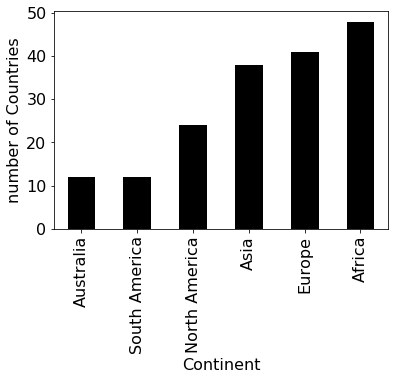

In [97]:
#Question 22: how many countries are in each continent? (answer with a plot)
matplotlib.rcParams["font.size"] = 16
plot_q22 = countries_q21.plot.bar(legend = False, color = "black")
plot_q22.set_ylabel("number of Countries")
plot_q22.set_xlabel("Continent")
plot_q22.set_xticklabels(countries_q21['continent'])

In [98]:
#Question 23: what is the total population of each continent?
countries_q23 = pd.read_sql("select continent, sum(population) as `total population (million)` from countries " +
                            "group by continent " +
                            "order by `total population (million)` desc", conn)
countries_q23['total population (million)'] = countries_q23['total population (million)'] / 1000000
countries_q23

,continent,total population (million)
0,Asia,3739.902863
1,Africa,824.954038
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


[Text(0,0,'Asia'),
 Text(0,0,'Africa'),
 Text(0,0,'Europe'),
 Text(0,0,'North America'),
 Text(0,0,'South America'),
 Text(0,0,'Australia')]

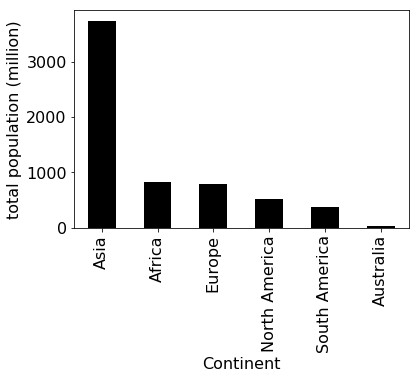

In [99]:
#Question 24: what is the total population of each continent? (answer with a plot)
plot_q24 = countries_q23.plot.bar(legend = False, color = "black")
plot_q24.set_ylabel("total population (million)")
plot_q24.set_xlabel("Continent")
plot_q24.set_xticklabels(countries_q23['continent'])

In [100]:
#Question 25: what is the population of each country in Australia?
countries_q25 = pd.read_sql("select country, population from countries " +
                            "where continent = 'Australia' " +
                            "order by population desc", conn)
countries_q25

,country,population
0,Australia,20264082
1,Papua New Guinea,5670544
2,New Zealand,4076140
3,Fiji,905949
4,French Polynesia,274578
5,New Caledonia,219246
6,Vanuatu,208869
7,Samoa,176908
8,Guam,171019
9,Tonga,114689


In [101]:
#Question 26: what are the top 10 countries that have the largest real GDP?
countries_q26 = pd.read_sql("select country, population * `gdp-per-capita` as `real GDP (billion)` from countries " + 
                            "order by `real GDP (billion)` DESC", conn)
countries_q26['real GDP (billion)'] = countries_q26['real GDP (billion)'] / 1000000000
countries_q26.head(10)

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


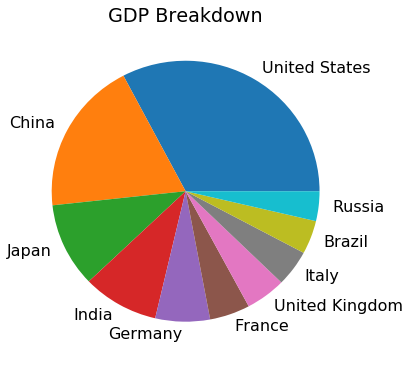

In [106]:
#Question 27: what are the top 10 countries that have the largest real GDP? (answer with a plot)
countries_q27 = countries_q26.head(10)
countries_q27_plot = countries_q27['real GDP (billion)']
countries_q27_plot.index = countries_q27['country']
countries_q27_plot.plot.pie(figsize=(6,6), title="GDP Breakdown", label = '')

In [107]:
#Question 28: what are the top 10 countries that have the largest gap between birth rate and death rate?
countries_q28 = pd.read_sql("select country, `birth-rate`, `death-rate` from countries " + 
                            "order by `birth-rate` - `death-rate` DESC", conn)
countries_q28.head(10)

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


Text(0.5,0,'rate')

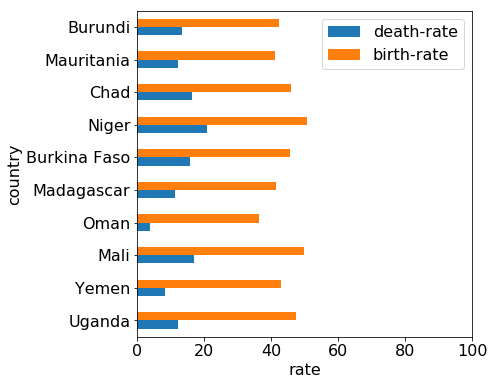

In [109]:
#Question 29: what are the top 10 countries that have the largest gap between birth rate and death rate? 
#(answer with a plot)
countries_q29 = countries_q28.head(10)
countries_q29.index = countries_q29['country']
plot_q29 = countries_q29.plot.barh(figsize=(6,6), y = ["death-rate", "birth-rate"])
plot_q29.axes.set_xlim(0,100)
plot_q29.set_xlabel('rate')

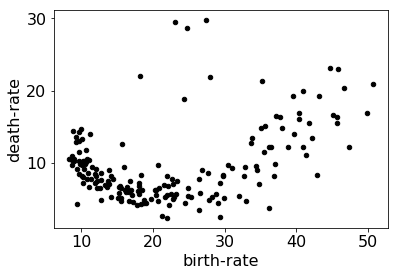

In [110]:
#Question 30: what is the relationship between birth rates and death rates? (answer with a plot)
countries_q30 = countries_q28
plot_q30 = countries_q30.plot.scatter(y = "death-rate", x = "birth-rate", color = "black")
plot_q30

In [112]:
#Question 31: notice that six outliers? which countries are they?
countries_q31 = pd.read_sql("select country, `birth-rate`, `death-rate` from countries " +
                            "where `death-rate` > 17 AND `birth-rate` < 30 " +
                            "order by `birth-rate`", conn)
countries_q31

,country,birth-rate,death-rate
0,South Africa,18.20,22.00
1,Botswana,23.08,29.50
2,Namibia,24.32,18.86
3,Lesotho,24.75,28.71
4,Swaziland,27.41,29.74
5,Zimbabwe,28.01,21.84


In [114]:
#Question 32: what is the correlation between birth rates and death rates?
countries_q30.corr().iloc[1,0]

0.40037782919521714

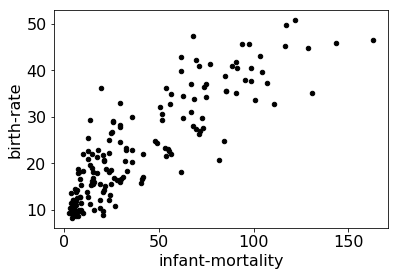

In [115]:
#Question 33: what is the relationship between infant mortality and birth rates?
countries_q33 = pd.read_sql("select `infant-mortality`, `birth-rate` from countries ", conn)
plot_q33 = countries_q33.plot.scatter(y = "birth-rate", x = 'infant-mortality', color = 'black')

In [117]:
#Question 34: what is the correlation between infant mortality and birth rates?
countries_q33.corr().iloc[1,0]

0.8687265678031416

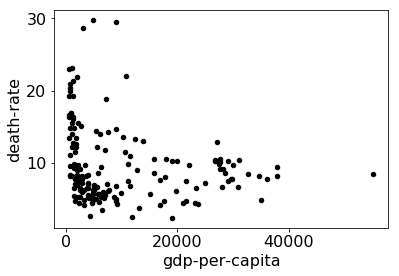

In [118]:
#Question 35: what is the relationship between GDP per capita and death rates?
countries_q35 = pd.read_sql("select `GDP-per-capita`, `death-rate` from countries ", conn)
plot_q35 = countries_q35.plot.scatter(y = "death-rate", x = 'gdp-per-capita', color = 'black')

In [121]:
#Question 36: what is the correlation between GDP per capita and death rates?:
countries_q35.corr().iloc[1,0]

-0.20995846867456752

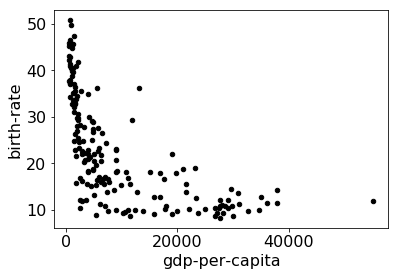

In [122]:
#Question 37: what is the relationship between GDP per capita and birth rates?
countries_q37 = pd.read_sql("select `GDP-per-capita`, `birth-rate` from countries ", conn)
plot_q37 = countries_q37.plot.scatter(y = "birth-rate", x = 'gdp-per-capita', color = 'black')

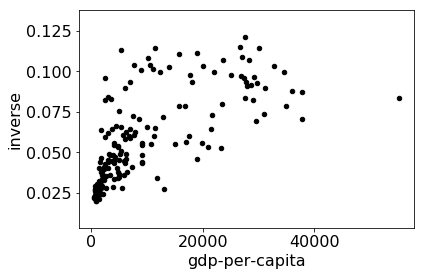

In [123]:
#Question 38: what is the relationship between GDP per capita and the inverse of birth rates?
countries_q38 = pd.read_sql("select `GDP-per-capita`, 1 / `birth-rate` as inverse from countries ", conn)
plot_q38 = countries_q38.plot.scatter(y = "inverse", x = 'gdp-per-capita', color = 'black')

In [124]:
#Question 39: fit a y = m * x + n line to the scatter plot in question 38 
#using the least-squares method; what are the coefficients m and n?
import numpy as np

df = countries_q38
df["1"] = 1

res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept



In [125]:
df

,gdp-per-capita,inverse,1
0,9900,0.065660,1
1,16900,0.056180,1
2,4900,0.034674,1
3,1000,0.025176,1
4,1600,0.030257,1
5,1000,0.022336,1
6,22000,0.099404,1
7,3700,0.064475,1
8,13100,0.027594,1
9,17700,0.097847,1


In [126]:
(m,n)

(1.8422394400496355e-06, 0.03903504364953538)

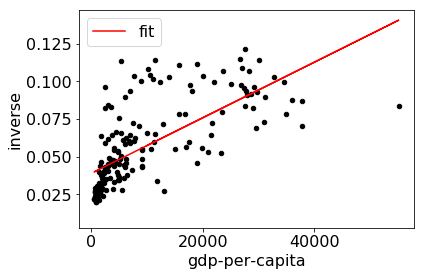

In [127]:
#Question 40: plot the regression line to the scatter plot
ax = df.plot.scatter(x='gdp-per-capita', y='inverse', color = 'black')
df["fit"] = df["gdp-per-capita"] * m + n
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)